<a href="https://colab.research.google.com/github/rbarman/AnimeGANs/blob/master/pull_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Later I should create a .py file...


In [ ]:
from IPython.display import Image as display_image
from google.colab import drive
import os
import random
import PIL
import shutil

**Get images**
- I saved results from https://github.com/bchao1/Anime-Face-Dataset to google drive
- Could get more samples using the haar cascade from https://github.com/nagadomi/animeface-2009

In [ ]:
%%capture
drive.mount('/content/drive')
!tar -xvzf  /content/drive/My\ Drive/Anime-Faces.tgz

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


In [ ]:
def view_rand_img(img_dir = '/content/cropped/'):
    imgs = os.listdir(img_dir)
    img_path = img_dir  + random.choice(imgs)
    print(img_path)
    return display_image(img_path)

/content/cropped/16641_2006.jpg


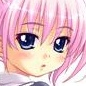

In [ ]:
view_rand_img()

In [ ]:
# There are some invalid images...
display_image('/content/cropped/44478_2013.jpg')

In [ ]:
# Remove the invalid images
for img_name in os.listdir('/content/cropped/'):
    img_path = f'/content/cropped/{img_name}'
    try:
        _ = PIL.Image.open(img_path)
    except PIL.UnidentifiedImageError:
    #print(f'{img_path} is an invalid image')
        os.remove(img_path)

In [ ]:
os.rename('/content/cropped/','/content/clean_images/')

In [ ]:
!ls

clean_images  drive  sample_data


In [ ]:
%%capture
!zip -r clean_images.zip /content/clean_images/

In [ ]:
shutil.move('/content/clean_images.zip', '/content/drive/My Drive/AnimeGANs/clean_images.zip')

'/content/drive/My Drive/AnimeGANs/clean_images.zip'